<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Linear_Regression_on_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

# Menghubungkan Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Persiapan Data

In [5]:
import pandas as pd

data = pd.read_csv('/content/gdrive/MyDrive/Salary_Data_Simple_SVR.csv')

In [6]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Pemisahan Data

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Pembuatan Model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluasi Model

In [10]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error", mse)

Mean Squared Error 49830096.85590839


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ...

# Lakukan prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mappe = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Tampilkan hasil evaluasi
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Percentage Error (MAPPE): {mappe}%')

Root Mean Squared Error (RMSE): 7059.04362190151
Mean Absolute Error (MAE): 6286.453830757749
R-squared (R2): 0.9024461774180497
Mean Absolute Percentage Error (MAPPE): 7.744880046205216%


Visualisasi Hasil

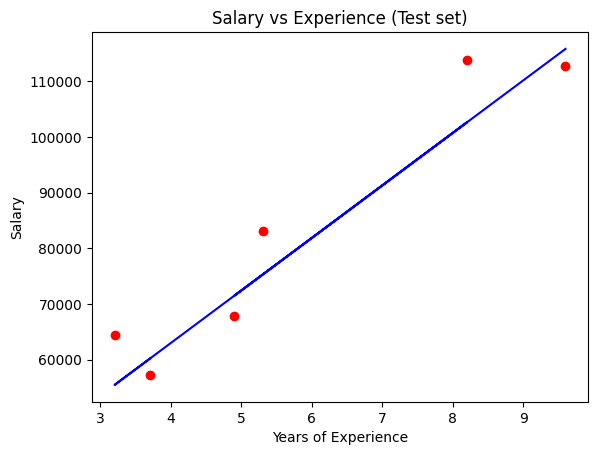

In [12]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

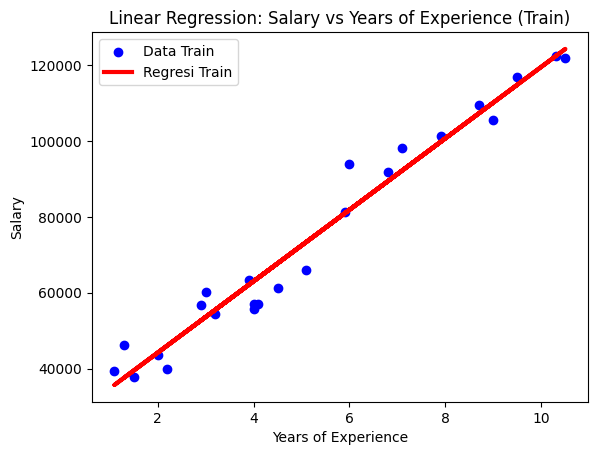

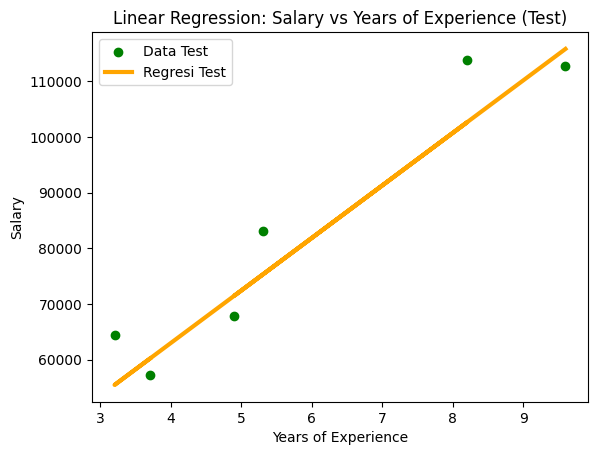

In [13]:
import matplotlib.pyplot as plt

# ...

# Lakukan prediksi menggunakan data pelatihan dan pengujian
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Visualisasi data pelatihan
plt.scatter(X_train, y_train, color='blue', label='Data Train')
plt.plot(X_train, y_train_pred, color='red', linewidth=3, label='Regresi Train')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience (Train)')
plt.legend()
plt.show()

# Visualisasi data pengujian
plt.scatter(X_test, y_test, color='green', label='Data Test')
plt.plot(X_test, y_test_pred, color='orange', linewidth=3, label='Regresi Test')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience (Test)')
plt.legend()
plt.show()


Menampilkan nilai aktual dan nilai prediksi

In [14]:
# Lakukan prediksi menggunakan data pengujian
y_test_pred = model.predict(X_test)

# Buat dataframe atau array NumPy dengan nilai aktual dan prediksi
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Tampilkan dataframe
print(results_df)

     Actual      Predicted
0  112635.0  115790.210113
1   67938.0   71498.278095
2  113812.0  102596.868661
3   83088.0   75267.804224
4   64445.0   55477.792045
5   57189.0   60189.699707


Input data baru

In [15]:
new_data = pd.DataFrame({'YearsExperience': [5.5, 8.2, 10]})
predicted_salary = model.predict(new_data)
for i in range(len(new_data)):
    print(f'Predicted Salary for {new_data["YearsExperience"][i]} years of experience: {predicted_salary[i]}')


Predicted Salary for 5.5 years of experience: 77152.56728844717
Predicted Salary for 8.2 years of experience: 102596.8686606308
Predicted Salary for 10.0 years of experience: 119559.73624208657


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
